In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, GroupShuffleSplit,RandomizedSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression


from IPython.display import HTML
import pandas as pd
import numpy as np
import base64


In [134]:
# print(os.listdir('../input/machinehack/MetalFurnace-Participants_Data'))

In [135]:
train_1 = pd.read_csv('Train.csv')
test_1 = pd.read_csv('Test.csv')
train = train_1.copy()
test = test_1.copy()

In [136]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [137]:
# train[train.columns.to_list()].corr()

In [138]:
from sklearn.decomposition import PCA
pca=PCA()
temp_df = train.copy()
temp_df = pca.fit_transform(temp_df)
variance=pca.explained_variance_ratio_

In [139]:
variance[23]

0.011572717892353654

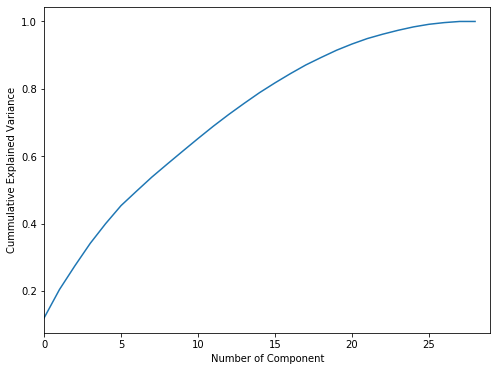

In [140]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,29,1)
plt.xlabel('Number of Component')
plt.ylabel('Cummulative Explained Variance')
plt.show()
x=np.cumsum(pca.explained_variance_ratio_)

In [141]:
delete = ['f24','f25','f26','f27']

In [142]:
for i in delete:
    del train[i]

In [143]:
feat = train.columns.to_list()
target = 'grade'
feat.remove(target)

In [159]:
Y_train = train_1['grade']
X_train = train_1.drop(['grade'],axis=1)
kfold = StratifiedKFold(n_splits=6)

In [160]:
# X_train.columns

In [162]:
# random_state = 2
# classifiers = []
# classifiers.append(XGBClassifier(random_state=random_state))
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(LinearDiscriminantAnalysis())
# # classifiers.append(CatBoostClassifier())


# cv_results = []
# for classifier in classifiers :
#     cv_results.append(cross_val_score(classifier, X_train.values, y = Y_train.values, scoring = "accuracy", cv = kfold, n_jobs=-1))

# print("Classfier \t Accuracy")
# for i in range(len(classifiers)):Q
#     model_name =str(classifiers[i]).split("(")[0]
#     print(f"{model_name} \t {cv_results[i].max()}")

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.3,random_state=0)

In [153]:
from sklearn.metrics import log_loss,accuracy_score
xgb = XGBClassifier(learning_rate=0.05,n_estimators=300,max_depth=3)
xgb.fit(x_train,y_train)
predictions = xgb.predict_proba(x_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))
# print(accuracy_score(y_test,predictions))

logloss: 0.144 


In [163]:
# ExtC = ExtraTreesClassifier()


# ## Search grid for optimal parameters
# ex_param_grid = {"max_depth": [None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [False],
#               "n_estimators" :[100,300],
#               "criterion": ["gini"]}


# gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsExtC.fit(X_train,Y_train)

# ExtC_best = gsExtC.best_estimator_

# # Best score
# gsExtC.best_score_


In [155]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [156]:
cat.fit(x_train,y_train)
predictions = cat.predict_proba(x_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))

0:	learn: 1.5582571	total: 6.26ms	remaining: 6.25s
1:	learn: 1.5078159	total: 10.4ms	remaining: 5.2s
2:	learn: 1.4593906	total: 11.9ms	remaining: 3.97s
3:	learn: 1.4094872	total: 14.9ms	remaining: 3.7s
4:	learn: 1.3674376	total: 18.7ms	remaining: 3.72s
5:	learn: 1.3211773	total: 21.8ms	remaining: 3.62s
6:	learn: 1.2922815	total: 25.4ms	remaining: 3.61s
7:	learn: 1.2526550	total: 29ms	remaining: 3.59s
8:	learn: 1.2226937	total: 31.5ms	remaining: 3.47s
9:	learn: 1.1970338	total: 33.6ms	remaining: 3.33s
10:	learn: 1.1649826	total: 35.7ms	remaining: 3.21s
11:	learn: 1.1374375	total: 37.9ms	remaining: 3.12s
12:	learn: 1.1125444	total: 39.3ms	remaining: 2.98s
13:	learn: 1.0860337	total: 41.4ms	remaining: 2.92s
14:	learn: 1.0653245	total: 43ms	remaining: 2.82s
15:	learn: 1.0450526	total: 45.1ms	remaining: 2.77s
16:	learn: 1.0248232	total: 47.3ms	remaining: 2.73s
17:	learn: 1.0053924	total: 48.4ms	remaining: 2.64s
18:	learn: 0.9886739	total: 50.4ms	remaining: 2.6s
19:	learn: 0.9668998	total: 5

179:	learn: 0.2668165	total: 375ms	remaining: 1.71s
180:	learn: 0.2659123	total: 381ms	remaining: 1.72s
181:	learn: 0.2639421	total: 384ms	remaining: 1.72s
182:	learn: 0.2633092	total: 386ms	remaining: 1.72s
183:	learn: 0.2622883	total: 388ms	remaining: 1.72s
184:	learn: 0.2614635	total: 392ms	remaining: 1.72s
185:	learn: 0.2607635	total: 395ms	remaining: 1.73s
186:	learn: 0.2599215	total: 398ms	remaining: 1.73s
187:	learn: 0.2589512	total: 400ms	remaining: 1.73s
188:	learn: 0.2581520	total: 402ms	remaining: 1.72s
189:	learn: 0.2557971	total: 405ms	remaining: 1.72s
190:	learn: 0.2552137	total: 407ms	remaining: 1.72s
191:	learn: 0.2547838	total: 411ms	remaining: 1.73s
192:	learn: 0.2530199	total: 413ms	remaining: 1.73s
193:	learn: 0.2523440	total: 416ms	remaining: 1.73s
194:	learn: 0.2517540	total: 418ms	remaining: 1.73s
195:	learn: 0.2497344	total: 420ms	remaining: 1.72s
196:	learn: 0.2487321	total: 422ms	remaining: 1.72s
197:	learn: 0.2480356	total: 424ms	remaining: 1.72s
198:	learn: 

357:	learn: 0.1500184	total: 745ms	remaining: 1.34s
358:	learn: 0.1495421	total: 748ms	remaining: 1.33s
359:	learn: 0.1489909	total: 751ms	remaining: 1.33s
360:	learn: 0.1486112	total: 753ms	remaining: 1.33s
361:	learn: 0.1483470	total: 755ms	remaining: 1.33s
362:	learn: 0.1478426	total: 757ms	remaining: 1.33s
363:	learn: 0.1473264	total: 760ms	remaining: 1.33s
364:	learn: 0.1466323	total: 763ms	remaining: 1.33s
365:	learn: 0.1462786	total: 765ms	remaining: 1.32s
366:	learn: 0.1458690	total: 768ms	remaining: 1.32s
367:	learn: 0.1454454	total: 770ms	remaining: 1.32s
368:	learn: 0.1451089	total: 772ms	remaining: 1.32s
369:	learn: 0.1446564	total: 774ms	remaining: 1.32s
370:	learn: 0.1440517	total: 776ms	remaining: 1.31s
371:	learn: 0.1436636	total: 778ms	remaining: 1.31s
372:	learn: 0.1432588	total: 780ms	remaining: 1.31s
373:	learn: 0.1427216	total: 782ms	remaining: 1.31s
374:	learn: 0.1423175	total: 785ms	remaining: 1.31s
375:	learn: 0.1419787	total: 787ms	remaining: 1.31s
376:	learn: 

518:	learn: 0.1051973	total: 1.12s	remaining: 1.04s
519:	learn: 0.1049687	total: 1.13s	remaining: 1.04s
520:	learn: 0.1047880	total: 1.14s	remaining: 1.04s
521:	learn: 0.1044483	total: 1.14s	remaining: 1.04s
522:	learn: 0.1042866	total: 1.14s	remaining: 1.04s
523:	learn: 0.1040761	total: 1.15s	remaining: 1.04s
524:	learn: 0.1038876	total: 1.16s	remaining: 1.05s
525:	learn: 0.1037199	total: 1.16s	remaining: 1.05s
526:	learn: 0.1035507	total: 1.17s	remaining: 1.05s
527:	learn: 0.1033713	total: 1.17s	remaining: 1.04s
528:	learn: 0.1032111	total: 1.17s	remaining: 1.04s
529:	learn: 0.1030705	total: 1.17s	remaining: 1.04s
530:	learn: 0.1028941	total: 1.18s	remaining: 1.04s
531:	learn: 0.1026939	total: 1.18s	remaining: 1.04s
532:	learn: 0.1025453	total: 1.18s	remaining: 1.03s
533:	learn: 0.1024147	total: 1.18s	remaining: 1.03s
534:	learn: 0.1022752	total: 1.19s	remaining: 1.03s
535:	learn: 0.1021496	total: 1.19s	remaining: 1.03s
536:	learn: 0.1020288	total: 1.19s	remaining: 1.03s
537:	learn: 

682:	learn: 0.0803780	total: 1.49s	remaining: 692ms
683:	learn: 0.0802131	total: 1.49s	remaining: 690ms
684:	learn: 0.0800417	total: 1.5s	remaining: 688ms
685:	learn: 0.0798550	total: 1.5s	remaining: 685ms
686:	learn: 0.0797642	total: 1.5s	remaining: 683ms
687:	learn: 0.0796916	total: 1.5s	remaining: 681ms
688:	learn: 0.0795477	total: 1.5s	remaining: 679ms
689:	learn: 0.0794683	total: 1.5s	remaining: 677ms
690:	learn: 0.0793524	total: 1.51s	remaining: 674ms
691:	learn: 0.0792771	total: 1.51s	remaining: 672ms
692:	learn: 0.0792005	total: 1.51s	remaining: 670ms
693:	learn: 0.0790935	total: 1.51s	remaining: 668ms
694:	learn: 0.0790014	total: 1.52s	remaining: 666ms
695:	learn: 0.0788416	total: 1.52s	remaining: 665ms
696:	learn: 0.0787886	total: 1.52s	remaining: 663ms
697:	learn: 0.0786987	total: 1.53s	remaining: 661ms
698:	learn: 0.0785979	total: 1.53s	remaining: 658ms
699:	learn: 0.0784703	total: 1.53s	remaining: 656ms
700:	learn: 0.0783460	total: 1.53s	remaining: 654ms
701:	learn: 0.0782

896:	learn: 0.0606920	total: 2.05s	remaining: 235ms
897:	learn: 0.0605972	total: 2.06s	remaining: 234ms
898:	learn: 0.0605612	total: 2.06s	remaining: 232ms
899:	learn: 0.0604714	total: 2.06s	remaining: 230ms
900:	learn: 0.0603883	total: 2.07s	remaining: 228ms
901:	learn: 0.0602836	total: 2.08s	remaining: 226ms
902:	learn: 0.0601752	total: 2.08s	remaining: 224ms
903:	learn: 0.0600910	total: 2.08s	remaining: 221ms
904:	learn: 0.0600191	total: 2.09s	remaining: 219ms
905:	learn: 0.0599541	total: 2.09s	remaining: 217ms
906:	learn: 0.0598903	total: 2.09s	remaining: 214ms
907:	learn: 0.0598440	total: 2.09s	remaining: 212ms
908:	learn: 0.0597562	total: 2.1s	remaining: 210ms
909:	learn: 0.0596666	total: 2.1s	remaining: 207ms
910:	learn: 0.0595837	total: 2.1s	remaining: 205ms
911:	learn: 0.0594963	total: 2.1s	remaining: 203ms
912:	learn: 0.0594354	total: 2.1s	remaining: 200ms
913:	learn: 0.0593135	total: 2.1s	remaining: 198ms
914:	learn: 0.0592244	total: 2.11s	remaining: 196ms
915:	learn: 0.0591

In [124]:
for i in delete:
    del test[i]

In [126]:
pred = cat.predict_proba(test)

In [128]:
sub = pd.DataFrame(pred)

In [132]:
sub.to_excel("CAT2.xlsx",index=False)

In [131]:
sub

,0,1,2,3,4
0,0.000308,0.001092,0.996652,0.001273,0.000675
1,0.003687,0.034232,0.033970,0.925332,0.002778
2,0.000917,0.000554,0.995157,0.002662,0.000709
3,0.004574,0.002202,0.039731,0.945182,0.008311
4,0.001128,0.000865,0.984564,0.012262,0.001180
...,...,...,...,...,...
261,0.000726,0.011114,0.984232,0.003567,0.000360
262,0.000722,0.002309,0.984563,0.004435,0.007971
263,0.002318,0.682897,0.306972,0.006986,0.000827
264,0.007677,0.211768,0.752390,0.011229,0.016936
